In [1]:
from pylab import *
import numpy as np

In [2]:
yr_to_s =  365 * 24 * 60 * 60 
s_to_yr = 1 / yr_to_s
km_to_cm = 1e3 * 1e2 
cm_to_km = 1  / km_to_cm

pc_to_cm = 3e18
cm_to_pc = 1 / pc_to_cm

Msun_to_g = 1.989e33 # gram 
g_to_Msun = 1 / Msun_to_g

k_B = 1.3807e-16 # cm^2 g s^-2 K^-1
m_H = 1.67e-24 # g 
G = 6.6743e-8 # cgs ...

# Homework 6: Angular Momentum

## Part I
The centrifugal radius: $R_c = \frac{j^2}{GM_*}$ tells us how angular momentum determines the radius at which material is deposited at during infall into disk formation. 
If we assume angular momentum conservation from the envelope down to the disk scales, we know that over time each infalling layer, i,  at a radius of $r_i$ has specific angular momentum $j_i = r_i^2 \Omega_i$.

### part a
In the TSC model, for $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$, each layer falls from a radius $r_i = (m_0/2) c_s t$ where $m_0 = 0.975$, a dimensionless constant and $c_s$ is the isothermal sound speed. 
For this model, derive $M_{*}(t)$ and $R_c(t)$. 

so we have established...

$R_c = \frac{j^2}{G M_*}$, $j_i = r_i^2 \Omega_i$, $r_i = 0.5 m_0 c_s t$

$j_i = (0.5 m_0 c_s t)^2 \Omega_i  = (1/4) m_0^2 c_s^2 t^2 \Omega_i$

Which we can plug into to get ... 

$R_c = \frac{( (1/4) m_0^2 c_s^2 t^2 \Omega_i )^2}{G M_*} = \frac{m_0^4 c_s^4 t^4 \Omega_i^2}{16 G M_*}$

We should now develop and expression for $ M_* $.

we can retype $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$ as $dM_{\rm in} = \frac{m_0 c_s^3}{G} dt $ and we end up with 

$M(t) = \frac{m_0c_s^3}{G} t$ 

Which we can plug into the above ... 

$R_c(t) = \frac{m_0^4 c_s^4 t^4 \Omega_i^2}{16 G} \frac{G}{m_0 c_s^3 t}$

and we can cancel terms to finally get

$R_c(t) = \frac{m_0^3 c_s \Omega_i^2}{16} t^3 $

In [3]:
def R_c(c_s, Omega, t, m_0=0.975):
    return m_0**3 * c_s * Omega**2 * t**3 / 16

def M_star(c_s, t, m_0 = 0.975): 
    return m_0 * c_s**3 * t / G

### part b
The break-up angular velocity of a rotating body is defined as where the gravitational energy is equal to the rotational energy. Above this value, the body would be torn apart by rotation as gravity would not be able to hold it together. 
Derive the break-up velocity for a protostellar core and calculate it in radians per second for a 1 solar mass core of about 0.1 pc in size. 

$ \frac{3}{5}\frac{G Mm}{r} = \frac{1}{2}I \omega^2$ 

$ I = \frac{2}{5}M r^2  $ 

$ \frac{3}{5}\frac{G Mm}{r} = \frac{1}{2}(\frac{2}{5}M r^2) \omega^2$ 



to which we can simplify as ... 

$\Omega = \sqrt{\frac{3GM}{R^3}}$

In [4]:
def Omega_crit(M, R):
    return np.sqrt(3 * G * M / R**3)

In [5]:
Omega_crit(1 * Msun_to_g, 0.1 * pc_to_cm)

1.2145041374980986e-13

### part c
Plot $Rc(t)$ for $c_s = 0.2 \ \mathrm{km \ s^{-1}}$ and $\Omega_i = 2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ for t between 0 and 500 kyr. How fast is the input angular velocity compared to break up? What is the resulting disk size at t=500 kyr? How much mass would have infallen in that time span?

In [6]:
c_s = 0.2 # km s^-1
Omega_i = 2e-14 # rad s^-1

In [7]:
'ratio of input to critical angular velocity: {:.2f}'.format(Omega_i / Omega_crit(1 * Msun_to_g, 0.1 * pc_to_cm))

'ratio of input to critical angular velocity: 0.16'

In [8]:
'The amount of mass that has infallen in the timespan is {:.2f}'.format(M_star(c_s * km_to_cm, 500 * 1e3 * yr_to_s) * g_to_Msun) + r'${\rm M}_\odot$'

'The amount of mass that has infallen in the timespan is 0.93${\\rm M}_\\odot$'

In [9]:
'The resulting disc size: {:.4f} pc'.format(R_c(c_s * km_to_cm, Omega_i, 500 * 1e3 * yr_to_s ) * cm_to_pc)

'The resulting disc size: 0.0006 pc'

Text(0, 0.5, '$R_{c} \\, [pc]$')

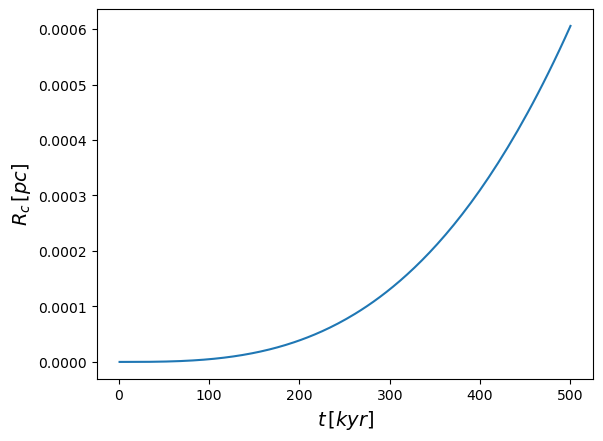

In [10]:
t_arr = np.logspace(np.log10(1), np.log10(500), 500) * 1e3 * yr_to_s #  

R = R_c(0.2 * km_to_cm, Omega_i, t_arr ) * cm_to_pc


plt.plot(t_arr * s_to_yr / 1e3, R)

plt.xlabel(r'$t \, [kyr]$', fontsize=14)
plt.ylabel(r'$R_{c} \, [pc]$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')

### part d
So far we have only been assuming that $\Omega_i$ is constant solid body rotation, but in principle $\Omega_i(r)$ could be a function of radius within the protostellar core. For instance, if we take the scaling of an turbulent sub-sonic eddy as in Larson's law, $v_{rot} \propto R^{-0.33}$. Solve for the corresponding $\Omega_i(r)$ and $Rc(t)$ with this more generalized behavior. 


We have $R_c(t) = \frac{m_0^3 c_s \Omega_i(r)^2}{16} t^3 $

$v_{\rm rot} \propto R^{-0.33} $, so really it looks akin to $v_{\rm rot} = \alpha R^{-1/3}$ to encaputulate the missing dimensionality, and $ v = \Omega r $ , so we can combine to get... 

$\Omega = \frac{v_{\rm rot}}{R} = \alpha \frac{R^{-1/3}}{R} = \alpha R^{-1/3 -1} = \alpha R^{-4/3}$   

So ... $R_c(t) = \frac{m_0^3 c_s ({\alpha R_c(t)^{-4/3}})^2}{16} t^3 = \frac{m_0^3 c_s \alpha^{2}  R_c(t)^{-8/3}  }{16} t^3 $


So ... $R_c(t)^{3/3 + 8/3} = \frac{m_0^3 c_s \alpha^{2}}{16} t^3 $


$R_c(t)^{11/3} = \frac{m_0^3 c_s \alpha^2 }{16} t^3 $

$R_c(t) = (\frac{m_0^3 c_s \alpha^2 }{16} t^3)^{3/11} $


### part e
Let's say that the angular velocity has the form: $\Omega_s \left( \frac{r}{r_s}\right)^{p}$. Where $\Omega_s =  2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ at $r_s = 0.05 \ \mathrm{pc}$ (to match measured values from observations at the same scale). Plot $Rc(t)$ for both the  uniform $\Omega_i$ and the turbulent $\Omega_i$ case on the same plot, assuming the power-law form above. When do both models have the same $R_c$? 
Based on what you know about mass deposition during disk formation, qualitatively, what would be the difference betweeen the disks formed under these two assumptions?

To go back: we have $R_c = \frac{m_0^3 c_s}{16}\Omega_i(r)^2 t^3 = \frac{m_0^3 c_s}{16}(\Omega_s (\frac{r}{r_s})^p)^2 t^3  = \frac{m_0^3 c_s}{16}\Omega_s^2 (\frac{R_c}{r_s})^{2p} t^3$


$R_c^{1-2p} = \frac{m_0^3 c_s}{16}\Omega_s^2 (\frac{1}{r_s})^{2p} t^3$

$R_c = (\frac{m_0^3 c_s}{16}\Omega_s^2 (\frac{1}{r_s})^{2p} t^3)^{1/(1 - 2p)}$

we now need to solve for what this power index is. note that p = 0 recovers our original solution so we are on the right track ... 

$\frac{1}{1-2p} = \frac{3}{11}$

$\frac{3}{3(1-2p)} = \frac{3}{11}$

$3(1-2p) = 11$

$11/3 = 1 - 2p$

$11/3 - 3/3 = 8/3 = -2p$

$p = -4/3$

In [11]:
def R_c_new(c_s, t, m_0=0.975):
    Omega_s = 2e-14
    r_s = 0.05 * pc_to_cm
    p = -4/3
    
    return (1/16 * m_0**3 * c_s * t**3 * Omega_s**2 * (1/ r_s)**(2*p))**(1/(1 - 2*p)) * cm_to_pc

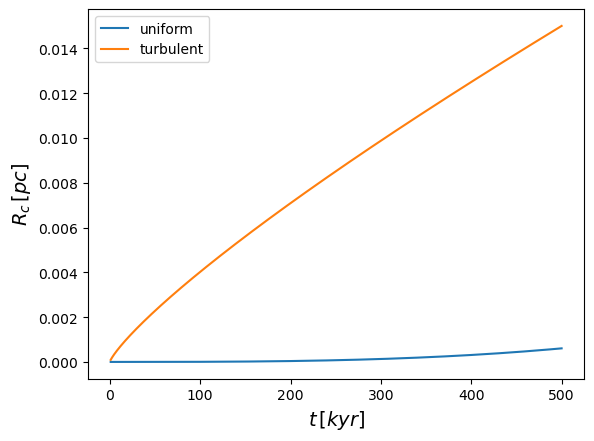

In [12]:
t_arr = np.logspace(np.log10(1), np.log10(500), 500) * 1e3 * yr_to_s #  

R_new = R_c_new(0.2 * km_to_cm, t_arr ) 


plt.plot(t_arr * s_to_yr / 1e3, R, label='uniform')
plt.plot(t_arr * s_to_yr / 1e3, R_new, label='turbulent')

plt.xlabel(r'$t \, [kyr]$', fontsize=14)
plt.ylabel(r'$R_{c} \, [pc]$', fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
plt.legend()

## Part II: *Menu* 

For additional menu points this week, use the $Rc(t)$ you calculated above, and the $\dot{\Sigma}(r,t)$ profile from Cassen+Moosman 1981 to numerically integrate through time to calculate $\Sigma(t)$ for the two cases in part d. (This gives us a very rough understanding of the resulting disk as it does not take into account angular momentum transport during this phase). Plot the resulting surface density profiles and comment on their differences. 

*Hint*: You may want your timesteps to be logarithmically spaced